In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import pickle
import numpy as np

base_path = './results_run_eprop/delayed_xor_results_*.pkl'

cs = [0.75]                                        #Correlation coefficient
ws = np.logspace(-1+0.375/2, 0.125-0.375/2, 3)  #Learning window
sigmas = [0.1]

model_files = glob(base_path)

c_idx = {k: i for i,k in enumerate(cs)}
w_idx = {k: i for i,k in enumerate(ws)}
sigma_idx = {k: i for i,k in enumerate(sigmas)}

In [3]:
model_files

['./results_run_eprop/delayed_xor_results_c_0.75_w_0.8659643233600653_sigma_0.1_n_0.pkl',
 './results_run_eprop/delayed_xor_results_c_0.75_w_0.1539926526059492_sigma_0.1_n_0.pkl',
 './results_run_eprop/delayed_xor_results_c_0.75_w_0.3651741272548377_sigma_0.1_n_0.pkl']

In [5]:
val_error_matrix = np.zeros((len(c_idx), len(w_idx), len(sigma_idx), 1))
n_iter_matrix = np.zeros((len(c_idx), len(w_idx), len(sigma_idx), 1))

for model_file in model_files:
    c = float(model_file.split('c_')[1].split('_')[0])
    w = float(model_file.split('w_')[1].split('_')[0])
    sigma = float(model_file.split('sigma_')[1].split('_')[0])
    n = int(model_file.split('n_')[2].split('_')[0].split('.')[0])
    with open(model_file, 'rb') as handle:
        results = pickle.load(handle)
    val_error_matrix[c_idx[c], w_idx[w], sigma_idx[sigma], n] = results['results']['val_errors'][-1]
    n_iter_matrix[c_idx[c], w_idx[w], sigma_idx[sigma], n] = results['results']['iterations'][-1]
    
val_error_matrix_mean = np.mean(val_error_matrix, axis = 3)
val_error_matrix_std = np.std(val_error_matrix, axis = 3)

n_iter_matrix_mean = np.mean(n_iter_matrix, axis = 3)
n_iter_matrix_std = np.std(n_iter_matrix, axis = 3)

## Some question about whether it's fair to take the max here. May be more fair to use a fixed noise level...
# When noise is too small, correlated noise does nothing, when noise is too large, it fails to learn. In some
# intermediate, we find the right amount of noise benefits from calibrating its window size.
min_n_iter_matrix_mean = np.min(n_iter_matrix_mean, axis = 2)
min_val_error_matrix_mean = np.min(val_error_matrix_mean, axis = 2)

#min_n_iter_matrix_mean = n_iter_matrix_mean[:,:,2]
#min_val_error_matrix_mean = val_error_matrix_mean[:,:,2]

idx_min_n_iter_matrix_mean = np.argmin(n_iter_matrix_mean, axis = 2)
idx_min_val_error_matrix_mean = np.argmin(val_error_matrix_mean, axis = 2)

#idx_min_val_error_matrix_mean
idx_min_n_iter_matrix_mean

array([[0, 0, 0]])

In [8]:
min_val_error_matrix_mean

array([[0.546875, 0.046875, 0.0625  ]])

In [9]:
min_n_iter_matrix_mean

array([[4999., 1107.,  560.]])

Text(0.5, 0, 'w')

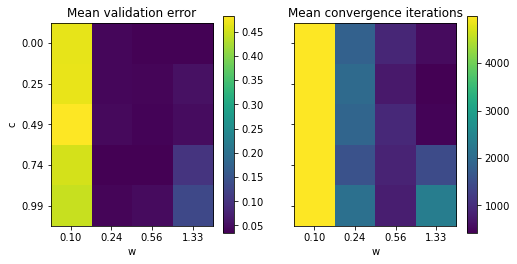

In [41]:
fig, ax = plt.subplots(1,2,figsize = (8,4), sharey = True)
f1 = ax[0].imshow(min_val_error_matrix_mean[:,:-1])
plt.colorbar(f1, ax = ax[0])
ax[0].set_title('Mean validation error')
ax[0].set_xticks(list(range(grid_size-1)))
ax[0].set_xticklabels([f'{w:0.2f}' for w in ws[:-1]]);
ax[0].set_yticks(list(range(grid_size)))
ax[0].set_yticklabels([f'{c:0.2f}' for c in cs]);
ax[0].set_xlabel('w')
ax[0].set_ylabel('c')

f2 = ax[1].imshow(min_n_iter_matrix_mean[:,:-1])
plt.colorbar(f2, ax = ax[1])
ax[1].set_title('Mean convergence iterations')
ax[1].set_xticks(list(range(grid_size-1)))
ax[1].set_xticklabels([f'{w:0.2f}' for w in ws[:-1]]);
ax[1].set_yticks(list(range(grid_size)))
ax[1].set_yticklabels([f'{c:0.2f}' for c in cs]);
ax[1].set_xlabel('w')
#ax[1].set_ylabel('c')
#plt.savefig('./figures/delayed_xor_sweep_results.pdf')